Processed 3 files in folder: C:\Users\halol.tccrnd1\Desktop\RRC\145 80 R12 FS
Processed 4 files in folder: C:\Users\halol.tccrnd1\Desktop\RRC\165 70 R14 BS EP150
Processed 2 files in folder: C:\Users\halol.tccrnd1\Desktop\RRC\205 55 R16 MICHE
Yayy! Task Completed!
😀
Outliers: []


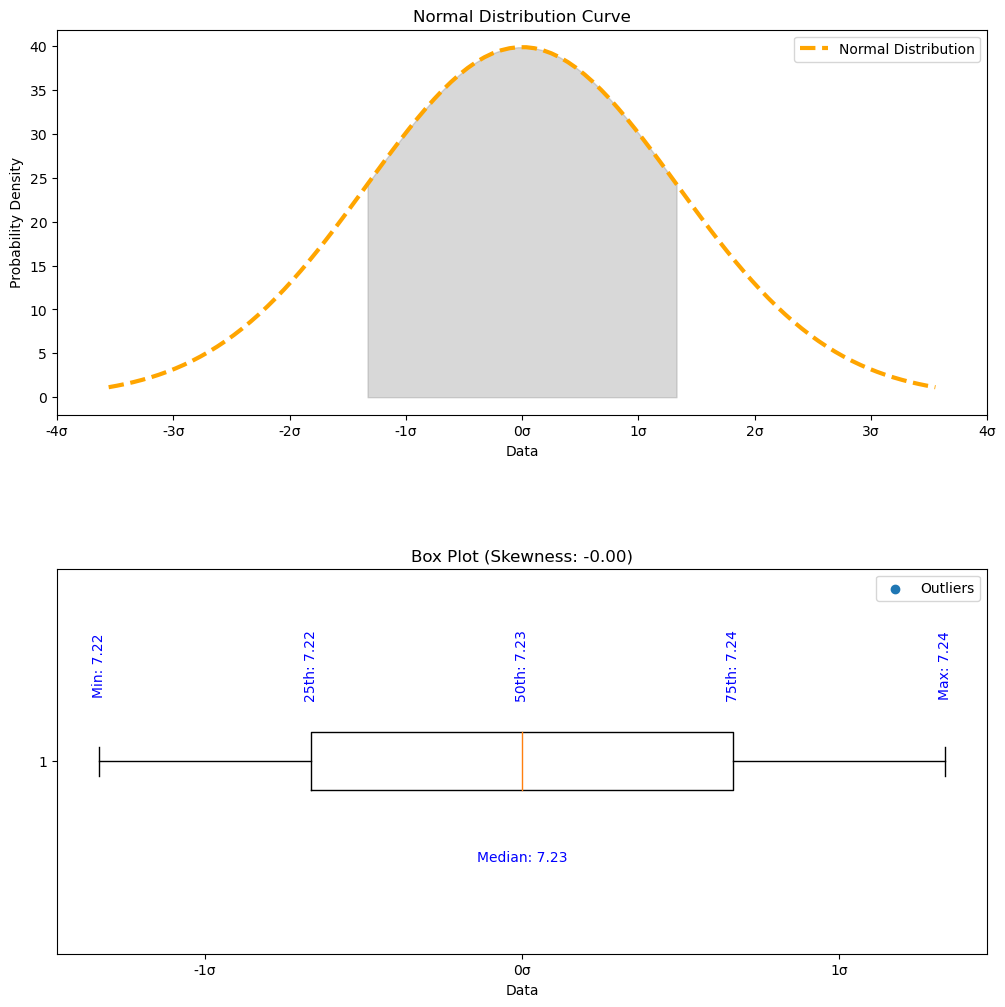

The percentage of values within -1 to 1 sigma range: 68.27


In [1]:
import os
import glob
from openpyxl import load_workbook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import norm

# Define the folder paths and corresponding sheet names
folder_paths = [r"C:\Users\halol.tccrnd1\Desktop\RRC\145 80 R12 FS",
                r"C:\Users\halol.tccrnd1\Desktop\RRC\165 70 R14 BS EP150",
                r"C:\Users\halol.tccrnd1\Desktop\RRC\205 55 R16 MICHE"]
sheet_names = ["145 80 R12 FS", "165 70 R14 BS EP150", "205 55 R16 MICHE"]
main_file_path = r'C:\Users\halol.tccrnd1\Desktop\RRC\PCR RR Control Tyre data From  New Control Tyre from -Dec 2022.xlsx'

# Load the main output file
main_workbook = load_workbook(main_file_path)
main_sheet = main_workbook.active

# Iterate over the folders and sheet names simultaneously
for folder_path, sheet_name in zip(folder_paths, sheet_names):
    # Find all the Excel files in the folder
    excel_files = glob.glob(os.path.join(folder_path, "*.xlsm"))

    # Get the corresponding sheet in the main output file
    sheet = main_workbook[sheet_name]

    # Get the max row in the corresponding sheet
    start_row = sheet.max_row + 1

    # Iterate over the Excel files
    for excel_file in excel_files:
        # Load the Excel file
        workbook = load_workbook(excel_file, data_only=True)
        
        # Get the sheet named 'FORM_1' in the Excel file
        sheet_to_copy = workbook['FORM_1']
        
        # Extract the required values from the sheet
        Test_Date = sheet_to_copy["O8"].value
        Test_NO = sheet_to_copy["L3"].value
        Speed = sheet_to_copy["E19"].value
        Full_load = sheet_to_copy["P19"].value
        Skim_load = sheet_to_copy["Q19"].value
        Amb_temp = sheet_to_copy["M19"].value
        Deflection = sheet_to_copy["H19"].value
        End_Ip = sheet_to_copy["G19"].value

        # Write the values to the corresponding sheet in the main output file
        sheet["A{}".format(start_row)] = Test_Date
        sheet["B{}".format(start_row)] = Test_NO
        sheet["E{}".format(start_row)] = Speed
        sheet["F{}".format(start_row)] = Full_load
        sheet["G{}".format(start_row)] = Skim_load
        sheet["I{}".format(start_row)] = Amb_temp
        sheet["O{}".format(start_row)] = Deflection
        sheet["P{}".format(start_row)] = End_Ip
        
        # Increment the start row
        start_row += 1

    # Print the number of files processed in each folder
    print("Processed {} files in folder: {}".format(len(excel_files), folder_path))
print("Yayy! Task Completed!")
print("\U0001F600")

# Save the main output file
main_workbook.save(main_file_path)

#DATA VISUALISATION#
def detect_outliers_iqr(data):
    """
    Detects outliers in a given dataset using the IQR method.
    
    Args:
    data (list or numpy array): The dataset for which outliers need to be detected.
    
    Returns:
    list: A list of outlier values.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3) of the data
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calculate the IQR (Interquartile Range)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers in the dataset
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    return outliers


# Read the Excel file and extract the values from the specified range of cells
df = pd.read_excel(r'C:\Users\halol.tccrnd1\Desktop\RRC\PCR RR Control Tyre data From  New Control Tyre from -Dec 2022.xlsx',
                   sheet_name='165 70 R14 BS EP150', usecols='K', skiprows=9, nrows=start_row, header=None)

# Check for missing or invalid values in the data
df_cleaned = df.dropna()  # Remove rows with missing values
values = df_cleaned.values.flatten().tolist()

# Calculate skewness
skewness = skew(values)

# Detect outliers using IQR method
outliers = detect_outliers_iqr(values)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the normal distribution curve on the first subplot
mean = np.mean(values)
std_dev = np.std(values)
x = np.linspace(mean - 2.667 * std_dev, mean + 2.667 * std_dev, 100)
y = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
lower_bound = mean - std_dev
upper_bound = mean + std_dev

ax1.plot(x, y, color='orange', linestyle='dashed', linewidth=3, label='Normal Distribution')
ax1.fill_between(x, y, where=((x >= lower_bound) & (x <= upper_bound)), color='gray', alpha=0.3)
ax1.set_xlabel('Data')
ax1.set_ylabel('Probability Density')
ax1.set_title('Normal Distribution Curve')
ax1.legend(['Normal Distribution'])

# Plot the box plot on the second subplot
boxplot = ax2.boxplot(values, vert=False)
ax2.set_xlabel('Data')
ax2.set_title(f'Box Plot (Skewness: {skewness:.2f})')

# Add x-axis labels representing standard deviations
x_ticks = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 9)
x_ticklabels = [f'{i}σ' for i in range(-4, 5)]
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticklabels)
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_ticklabels)

# Add text annotations on the box plot
min_val = np.min(values)
max_val = np.max(values)
q25 = np.percentile(values, 25)
q50 = np.percentile(values, 50)
q75 = np.percentile(values, 75)
median_val = np.median(values)

ax2.text(min_val, 1.25, f'Min: {min_val:.2f}', rotation='vertical', ha='center', va='center', color='blue')
ax2.text(max_val, 1.25, f'Max: {max_val:.2f}', rotation='vertical', ha='center', va='center', color='blue')
ax2.text(q25, 1.25, f'25th: {q25:.2f}', rotation='vertical', ha='center', va='center', color='blue')
ax2.text(q50, 1.25, f'50th: {q50:.2f}', rotation='vertical', ha='center', va='center', color='blue')
ax2.text(q75, 1.25, f'75th: {q75:.2f}', rotation='vertical', ha='center', va='center', color='blue')
ax2.text(median_val, 0.75, f'Median: {median_val:.2f}', ha='center', va='center', color='blue')

# Highlight outliers in the box plot
if boxplot['fliers']:
    outlier_vals = [item.get_xdata() for item in boxplot['fliers']]
    ax2.scatter(outlier_vals, np.ones_like(outlier_vals), marker='o', label='Outliers')

ax2.legend()

# Print the detected outliers
print("Outliers:", [round(val, 2) for val in outliers])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()

# Calculate the percentage of values within -1 to 1 sigma range
within_1sigma = norm.cdf(upper_bound, mean, std_dev) - norm.cdf(lower_bound, mean, std_dev)
within_1sigma_percentage = within_1sigma * 100

print("The percentage of values within -1 to 1 sigma range:", round(within_1sigma_percentage, 2))